In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

from glob import glob

from desimodel.focalplane.geometry import FocalPlane

In [26]:
qcfiles = sorted(glob('/global/project/projectdirs/desi/spectro/nightwatch/kpno/20191030/00023044/qcframe*'))
qcfiles

['/global/project/projectdirs/desi/spectro/nightwatch/kpno/20191030/00023044/qcframe-b3-00023044.fits',
 '/global/project/projectdirs/desi/spectro/nightwatch/kpno/20191030/00023044/qcframe-r3-00023044.fits',
 '/global/project/projectdirs/desi/spectro/nightwatch/kpno/20191030/00023044/qcframe-z3-00023044.fits']

In [17]:
hdus = fits.open(qcfiles[0])

In [18]:
for hdu in hdus:
    print(hdu.header['EXTNAME'])

FLUX
IVAR
MASK
YSIGMA
WAVELENGTH
FIBERMAP


In [22]:
hdus['FIBERMAP'].columns

ColDefs(
    name = 'TARGETID'; format = 'K'
    name = 'DESI_TARGET'; format = 'K'
    name = 'BGS_TARGET'; format = 'K'
    name = 'MWS_TARGET'; format = 'K'
    name = 'SECONDARY_TARGET'; format = 'K'
    name = 'TARGET_RA'; format = 'D'; unit = 'deg'
    name = 'TARGET_DEC'; format = 'D'; unit = 'deg'
    name = 'TARGET_RA_IVAR'; format = 'D'; unit = 'deg-2'
    name = 'TARGET_DEC_IVAR'; format = 'D'; unit = 'deg-2'
    name = 'BRICKID'; format = 'K'
    name = 'BRICK_OBJID'; format = 'K'
    name = 'MORPHTYPE'; format = '4A'
    name = 'PRIORITY'; format = 'J'
    name = 'SUBPRIORITY'; format = 'D'
    name = 'REF_ID'; format = 'K'
    name = 'PMRA'; format = 'E'; unit = '10**-3 arcsec yr-1'
    name = 'PMDEC'; format = 'E'; unit = '10**-3 arcsec yr-1'
    name = 'REF_EPOCH'; format = 'E'
    name = 'PMRA_IVAR'; format = 'E'; unit = '10**6 arcsec-2 yr2'
    name = 'PMDEC_IVAR'; format = 'E'; unit = '10**6 arcsec-2 yr2'
    name = 'RELEASE'; format = 'I'
    name = 'FLUX_G'; format

In [24]:
x, y = [hdus['FIBERMAP'].data['FIBERASSIGN_{}'.format(val)] for val in ('X', 'Y')]

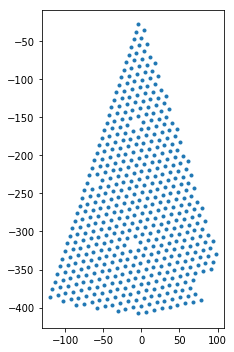

In [25]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.plot(x, y, '.')
ax.set(aspect='equal')
fig.tight_layout()

In [29]:
hdus['FLUX'].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 4096                                                  
NAXIS2  =                  500                                                  
EXTEND  =                    T                                                  
EXTNAME = 'FLUX    '                                                            
INSTRUME= 'DESI    '           / Instrument name                                
PROCTYPE= 'RAW     '           / Data processing level                          
PRODTYPE= 'image   '           / Data product type                              
PROGRAM = 'Raster test'        / Program name                                   
EXPID   =                22981 / Exposure number                                
EXPFRAME=                   

In [55]:
for idx in range(500):
    s = '{:3d} -'.format(idx)
    for qcfile in qcfiles:
        hdus = fits.open(qcfile)
        wavedata = hdus['WAVELENGTH'].data
        fluxdata = hdus['FLUX'].data
        fluxhead = hdus['FLUX'].header
        camera = fluxhead['CAMERA'][0].upper()
        s = '{} {:s}: {:10.3f}'.format(s, camera, np.trapz(fluxdata[idx], wavedata[idx]))
    print(s)

  0 - B:  24496.316 R:   4048.778 Z:   5118.753
  1 - B:  21115.778 R:   -397.768 Z:   -667.769
  2 - B:  17510.492 R:    587.855 Z:  -1479.625
  3 - B:  15639.913 R:   -167.651 Z:   -415.711
  4 - B:  11666.122 R:   -558.726 Z:   -319.934
  5 - B:  21676.025 R:     68.056 Z:     -3.128
  6 - B:  12843.585 R:    147.437 Z:    461.934
  7 - B:  18648.584 R:   -715.338 Z:    564.783
  8 - B:  18464.276 R:    540.887 Z:    255.662
  9 - B:  16319.514 R:    696.071 Z:    111.511
 10 - B:  12395.231 R:    283.913 Z:    492.226
 11 - B:  24414.852 R:   -222.356 Z:    687.453
 12 - B:  15391.196 R:   -145.995 Z:   1989.901
 13 - B:  11959.001 R:    592.773 Z:   2431.479
 14 - B:  16042.516 R:    953.718 Z:   2092.496
 15 - B:  16745.120 R:    829.432 Z:   -289.548
 16 - B:  16421.922 R:    118.439 Z:   -200.143
 17 - B:  14263.483 R:    291.158 Z:   -147.809
 18 - B:  16348.024 R:    388.415 Z:   -168.140
 19 - B:  25705.919 R:   -354.841 Z:   -533.520
 20 - B:  11248.862 R:     -3.748 Z:   1

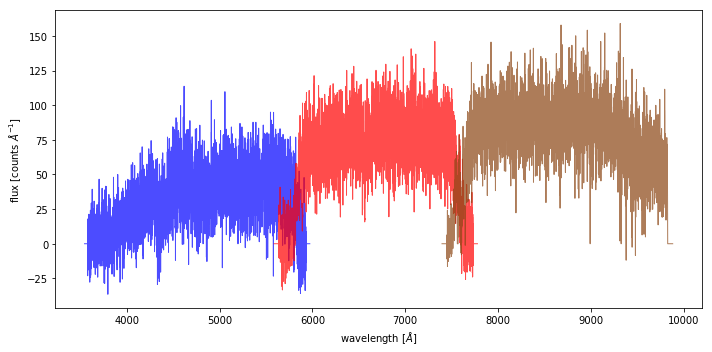

In [57]:
color = { 'B':'blue', 'R':'red', 'Z':'saddlebrown' }
fig, ax = plt.subplots(1,1, figsize=(10,5))

idx = 394

for qcfile in qcfiles:
    hdus = fits.open(qcfile)
    wavedata = hdus['WAVELENGTH'].data
    fluxdata = hdus['FLUX'].data
    fluxhead = hdus['FLUX'].header
    camera = fluxhead['CAMERA'][0].upper()
    ax.plot(wavedata[idx], fluxdata[idx], lw=1, color=color[camera], alpha=0.7)

ax.set(xlabel=r'wavelength [$\AA$]',
       ylabel=r'flux [counts $\AA^{-1}$]')
fig.tight_layout()

In [60]:
wavedata.shape

(500, 4128)

In [64]:
x = np.zeros(4096, dtype=float)
x.ndim, wavedata.ndim, len(x), len(wavedata)

(1, 2, 4096, 500)